In [98]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.figure import Figure as plt_Figure
from matplotlib.axes import Axes as plt_Axes
from skimage import io, data
from skimage.transform import resize, rescale
from skimage.color import rgb2gray
from skimage.exposure import rescale_intensity, adjust_gamma
import numpy as np
from typing import cast, TypeVar, Any
import random

## Zadanie 1

a) Wczytaj czarno-biały obraz camera i korzystając z polecenia np.histogram 
wykonaj histogram tego obrazu dla 256 "kubełków". Przedział dla kubełków
[0:257). Histogram zaprezentuj na wykresie `matplotlib` jako linię
(użyj `plt.plot`). Obok zaprezentuj obraz.

In [99]:
plt.ioff()
axs: np.ndarray
fig, axs = plt.subplots(2, 2)

img_camera: np.ndarray = data.camera()
cast(plt_Axes, axs[0, 0]).imshow(img_camera, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[0, 0]).axis(False)

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_camera, bins=256, range=(0, 255))
cast(plt_Axes, axs[0, 1]).plot(x, hist)
cast(plt_Axes, axs[0, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[0, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[0, 1]).set_title("histogram ciągły")

Text(0.5, 1.0, 'histogram ciągły')

b) Dla tego samego obrazu przygotuj histogram dla 8 kubełków i tego samego
zakresu. Histogram zaprezentuj na wykresie matplotlib jako słupki (`plt.bar`)

In [100]:
x = np.arange(0, 8, 1)
hist, _ = np.histogram(img_camera, bins=8, range=(0, 255))
cast(plt_Axes, axs[1, 0]).bar(x, hist)
cast(plt_Axes, axs[1, 0]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 0]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 0]).set_title("histogram dyskretny")

Text(0.5, 1.0, 'histogram dyskretny')

c) dla tego samego obrazu wykonaj histogram skumulowany i zaprezentuj go jako 
linię. Wskazówka Dla zwykłego histogramu użyj funkcji `np.cumsum`

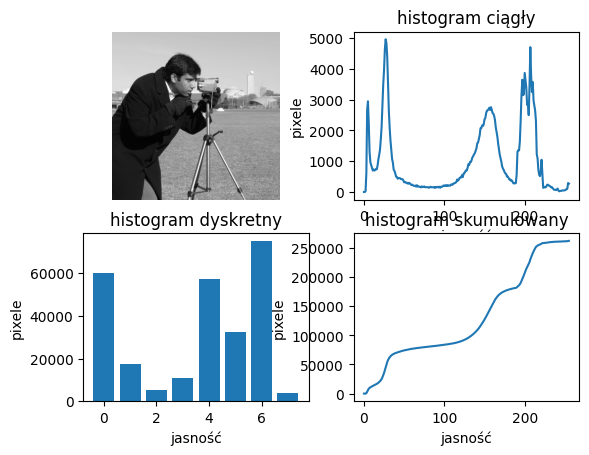

In [101]:
x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_camera, bins=256, range=(0, 255))
hist = np.cumsum(hist)
cast(plt_Axes, axs[1, 1]).plot(x, hist)
cast(plt_Axes, axs[1, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 1]).set_title("histogram skumulowany")

plt.show()

# Zadanie 2

a) Na pierwszym wykresie histogramu zaobserwuj miejsce bliskie zeru, dla którego
wykres nieznacznie się podnosi. Zanotuj tą wartość jako a. Podobnie, metodą 
obserwacji znajdź liczbę b bliską 255, poniżej której wykres wyraźnie się 
podnosi.

Na stronie http://scikit-image.org/docs/dev/api/skimage.exposure.html jest lista
komend dla zmiany jasności i kontrastu obrazu. Wykorzystaj rescale_intensity 
z parametrami a i b. Ponownie wyświetl obraz i jego histogram. 
Może on wyglądać tak

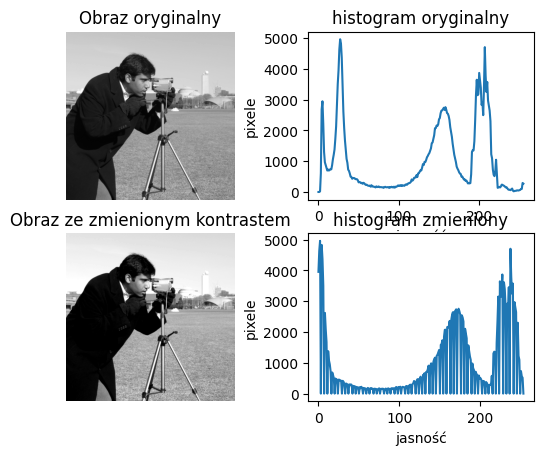

In [102]:
_, axs = plt.subplots(2, 2)

cast(plt_Axes, axs[0, 0]).imshow(img_camera, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Obraz oryginalny")

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_camera, bins=256, range=(0, 255))
cast(plt_Axes, axs[0, 1]).plot(x, hist)
cast(plt_Axes, axs[0, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[0, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[0, 1]).set_title("histogram oryginalny")

img_camera_int = rescale_intensity(img_camera, (24, 220))

cast(plt_Axes, axs[1, 0]).imshow(img_camera_int, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Obraz ze zmienionym kontrastem")

x = np.arange(0, 254, 1)
hist, _ = np.histogram(img_camera_int, bins=254, range=(1, 254))
cast(plt_Axes, axs[1, 1]).plot(x, hist)
cast(plt_Axes, axs[1, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 1]).set_title("histogram zmieniony")

plt.show()

Jeśli na brzegach są bardzo wysokie słupki oznacza to, że wartość a jest zbyt
duża, a wartość b, za mała. Skoryguj te wartości. Wyjaśnij, dlaczego po takiej
operacji dla niektórych kubełków histogramu pojawiły się zera?

In [103]:
# "Dziury" w histogramie / wartości 0 wynikają z faktu, że algorytm skalowania
#  wartości dla typu `np.uint64`, prawdopodobnie wybiera jedynie wartości 
# z oryginalnej dziedziny i "rozciąga" je wzdłuż nowej dziedziny, starając się 
# dobrać równej wielkości przestrzenie zerowych wartości pomiędzy niezerowymi.

# Żeby zniwelować ów "dziury", potrzebny byłby algorytm "wygładzający" wartości,
# jak na przykład rozmycie Gaussa

b) powyższe operacje wykonaj dla załączonego obrazu dark_image.png. Chcemy 
rozjaśnić obraz tą samą metodą. Jakie ustaliłeś a i b? Czy można osiągnąć 
zadowalający efekt? Następnie spróbuj użyć funkcji adjust_gamma. Jaki parametr 
(>1 czy <1) powinien być zastosowany, aby uzyskać rozjaśnienie obrazu? Jaka 
wartość daje najładniejszy efekt? A może najpierw użyć korekcji gamma a 
następnie zmienić skalę?

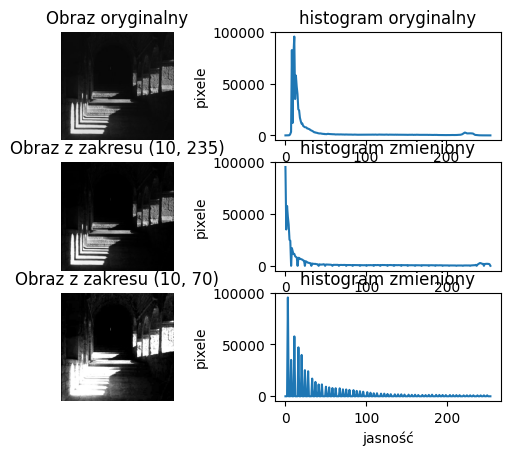

In [104]:
_, axs = plt.subplots(3, 2)

img_dark = io.imread("./lab2/dark_image.png")

cast(plt_Axes, axs[0, 0]).imshow(img_dark, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Obraz oryginalny")

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_dark, bins=256, range=(0, 255))
cast(plt_Axes, axs[0, 1]).plot(x, hist)
cast(plt_Axes, axs[0, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[0, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[0, 1]).set_title("histogram oryginalny")

img_dark_int = rescale_intensity(img_dark, (10, 235))

cast(plt_Axes, axs[1, 0]).imshow(img_dark_int, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Obraz z zakresu (10, 235)")

x = np.arange(0, 254, 1)
hist, _ = np.histogram(img_dark_int, bins=254, range=(1, 254))
cast(plt_Axes, axs[1, 1]).plot(x, hist)
cast(plt_Axes, axs[1, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 1]).set_title("histogram zmieniony")

img_dark_int = rescale_intensity(img_dark, (10, 70))

cast(plt_Axes, axs[2, 0]).imshow(img_dark_int, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[2, 0]).axis(False)
cast(plt_Axes, axs[2, 0]).set_title("Obraz z zakresu (10, 70)")

x = np.arange(0, 254, 1)
hist, _ = np.histogram(img_dark_int, bins=254, range=(1, 254))
cast(plt_Axes, axs[2, 1]).plot(x, hist)
cast(plt_Axes, axs[2, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[2, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[2, 1]).set_title("histogram zmieniony")

plt.show()

In [105]:
# Uzyskanie zadowalającego efektu jest niemal niemożliwe - większość histogramu
# skupiona jest w zakresie [10, 70], jednak część histogramu również odchyla się
# w zakresie (220, 235) - to sprawia, że użycie zakresu (10, 235) nie daje 
# prawie żadnej zmiany w kontraście, natomiast zakres (10, 70) prowadzi do mocno
# prześwietlonego obrazu, w którym dodatkowo następuje utrata części szczegółów

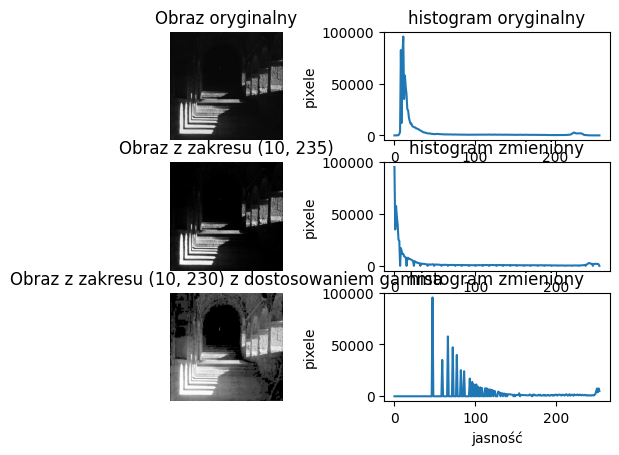

In [106]:
_, axs = plt.subplots(3, 2)

img_dark = io.imread("./lab2/dark_image.png")

cast(plt_Axes, axs[0, 0]).imshow(img_dark, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[0, 0]).axis(False)
cast(plt_Axes, axs[0, 0]).set_title("Obraz oryginalny")

x = np.arange(0, 256, 1)
hist, _ = np.histogram(img_dark, bins=256, range=(0, 255))
cast(plt_Axes, axs[0, 1]).plot(x, hist)
cast(plt_Axes, axs[0, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[0, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[0, 1]).set_title("histogram oryginalny")

img_dark_int = rescale_intensity(img_dark, (10, 235))

cast(plt_Axes, axs[1, 0]).imshow(img_dark_int, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[1, 0]).axis(False)
cast(plt_Axes, axs[1, 0]).set_title("Obraz z zakresu (10, 235)")

x = np.arange(0, 254, 1)
hist, _ = np.histogram(img_dark_int, bins=254, range=(1, 254))
cast(plt_Axes, axs[1, 1]).plot(x, hist)
cast(plt_Axes, axs[1, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[1, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[1, 1]).set_title("histogram zmieniony")

img_dark_int = adjust_gamma(img_dark_int, 0.3)

cast(plt_Axes, axs[2, 0]).imshow(img_dark_int, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[2, 0]).axis(False)
cast(plt_Axes, axs[2, 0]).set_title("Obraz z zakresu (10, 230) z dostosowaniem gamma")

x = np.arange(0, 254, 1)
hist, _ = np.histogram(img_dark_int, bins=254, range=(1, 254))
cast(plt_Axes, axs[2, 1]).plot(x, hist)
cast(plt_Axes, axs[2, 1]).set_xlabel("jasność")
cast(plt_Axes, axs[2, 1]).set_ylabel("pixele")
cast(plt_Axes, axs[2, 1]).set_title("histogram zmieniony")

plt.show()

In [107]:
# Użycie funkcji `adjust_gamma` na wyciętym zakresie (10, 235), pozwala uzyskać
# obraz zawierający zadowalający poziom kontrastu, a jednocześnie dużą
# szczegółowość

# Zadanie 3

Wczytaj barwny obraz skimage.data.chelsea() lub skimage.data.coffee()

Wykonaj dla histogramu wykresy liniowy i słupkowy podobnie, jak w Zadaniu 1,
ale dla kanałów R, G, B koloru, 3 wykresy na jednej figurze.

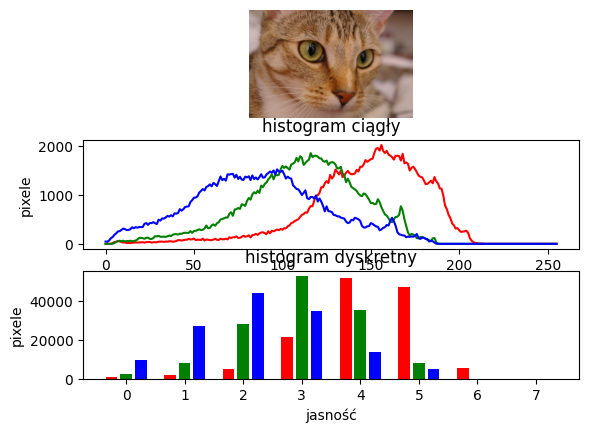

In [108]:
axs: np.ndarray
fig, axs = plt.subplots(3, 1)

img_c: np.ndarray = data.chelsea()
cast(plt_Axes, axs[0]).imshow(img_c)
cast(plt_Axes, axs[0]).axis(False)

x = np.arange(0, 256, 1)
hist = [
    np.histogram(img_c[:, :, 0], bins=256, range=(0, 255)),
    np.histogram(img_c[:, :, 1], bins=256, range=(0, 255)),
    np.histogram(img_c[:, :, 2], bins=256, range=(0, 255)),
]
cast(plt_Axes, axs[1]).plot(x, hist[0][0], color="r")
cast(plt_Axes, axs[1]).plot(x, hist[1][0], color="g")
cast(plt_Axes, axs[1]).plot(x, hist[2][0], color="b")
cast(plt_Axes, axs[1]).set_xlabel("jasność")
cast(plt_Axes, axs[1]).set_ylabel("pixele")
cast(plt_Axes, axs[1]).set_title("histogram ciągły")


labels = np.arange(0, 8, 1)
x = np.arange(0, 32, 4)
hist = [
    np.histogram(img_c[:, :, 0], bins=8, range=(0, 255)),
    np.histogram(img_c[:, :, 1], bins=8, range=(0, 255)),
    np.histogram(img_c[:, :, 2], bins=8, range=(0, 255)),
]
cast(plt_Axes, axs[2]).bar(x, hist[0][0], color="r")
cast(plt_Axes, axs[2]).bar(x+1, hist[1][0], color="g")
cast(plt_Axes, axs[2]).bar(x+2, hist[2][0], color="b")
cast(plt_Axes, axs[2]).set_xticks(x+1, labels)
cast(plt_Axes, axs[2]).set_xlabel("jasność")
cast(plt_Axes, axs[2]).set_ylabel("pixele")
cast(plt_Axes, axs[2]).set_title("histogram dyskretny")

plt.show()

# Zadanie 4

a) przygotuj w Pythonie funkcję liniową, która dla dowolnej liczby z przedziału
[0:256] będzie tworzyła wykres, jak poniżej.

Funkcję określ tak, że przechodzi przez punkt 128,128 oraz ma zakres wartości
ograniczony do przedziału [0:256]. Niech dodatkowym parametrem tej funkcji
(oprócz x) będzie a, która jest nachyleniem funkcji liniowej. Na powyższym
wykresie `a>1`. Funkcja ta powinna zwracać wartość zaokrągloną do całkowitej.

Funkcja ta przekształci jasność każdego punktu obrazu w nową jasność.

In [109]:
def fun_map(a: float, src: np.ndarray):
    return np.clip(a * (src - 128) + 128, 0, 255)

Jednak zwykle nie robi się tego bezpośrednio, tylko poprzez tzw. LUT

LUT jest tablicą, która pod indeksem i przechowuje więc wartość fun(i). Np.
```python
a = 1.2

LUT = [fun(x, a) for x in range(256)]
```

In [110]:
def LUT(a: float):
    return np.uint8(fun_map(a, np.arange(0, 256, 1)))

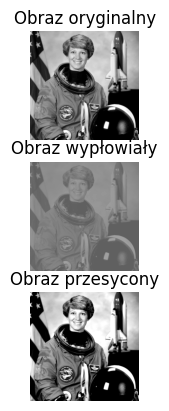

In [111]:
lut_0_25 = LUT(0.25)
lut_1_5 = LUT(1.5)

axs: np.ndarray
fig, axs = plt.subplots(3, 1)

img_a = data.astronaut()
img_a = np.uint(rgb2gray(img_a) * 255)

cast(plt_Axes, axs[0]).imshow(img_a, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[0]).axis(False)
cast(plt_Axes, axs[0]).set_title("Obraz oryginalny")

img_a_0_25 = lut_0_25[img_a]
cast(plt_Axes, axs[1]).imshow(img_a_0_25, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[1]).axis(False)
cast(plt_Axes, axs[1]).set_title("Obraz wypłowiały")

img_a_1_5 = lut_1_5[img_a]
cast(plt_Axes, axs[2]).imshow(img_a_1_5, cmap="gray", vmin=0, vmax=255)
cast(plt_Axes, axs[2]).axis(False)
cast(plt_Axes, axs[2]).set_title("Obraz przesycony")

plt.show()